In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y[index]])

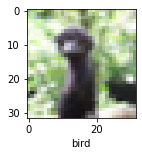

In [8]:
plot_sample(x_train, y_train, 55)

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32,activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])



In [10]:
cnn.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [11]:
cnn.fit(x_train, y_train, epochs=5)

In [ ]:
cnn.evaluate(x_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("calssification Report : \n", classification_report(y_test,y_pred_classes))

In [10]:
y_test = y_test.reshape(-1,)
print(y_test[:7])
print("y_test shape changed>>>>>>>>>>>>")

[3 8 8 0 6 6 1]
y_test shape changed>>>>>>>>>>>>


In [16]:
def image(x= int(input("Please enter index number : "))):
    print("Actual class of image : ", classes[y_test[x]])
    print("Predictesd class of image : " ,classes[y_pred_classes[x]])

image()

Please enter index number : 5
Actual class of image :  frog


NameError: name 'y_pred_classes' is not defined